In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from scipy.stats import spearmanr

In [2]:
%matplotlib notebook

# Volume Limited Sample of Normal SNe Ia

This notebook provides summary statistics when examining a volume limited sample of "normal" SNe Ia from the ZTF 2018 early sample.

In [3]:
info_path="../../forced_lightcurves/sample_lc_v2/"
salt_df = pd.read_csv(info_path + "../../Nobs_cut_salt2_spec_subtype_pec.csv")
res = pd.read_csv('results_40percent.csv')
res_tsquared = pd.read_csv('results_40_tsquared.csv')

In [4]:
normal = np.where((salt_df['Ia subtype'] != 'Ia-CSM') & 
                  (salt_df['Ia subtype'] != 'SC') & 
                  (salt_df['Ia subtype'] != 'SC*') & 
                  (salt_df['Ia subtype'] != '86G-like') & 
                  (salt_df['Ia subtype'] != '02cx-like'))
good = np.where(res.final_selection.values == 1)
has_host_z = np.where(salt_df.z_source != 'Msl')

normal_good = np.intersect1d(normal, good)
normal_good_host = np.intersect1d(normal_good, has_host_z)

# rearange for plotting
normal_plot = np.setdiff1d(normal[0], normal_good)
normal_good_plot = np.setdiff1d(normal_good, normal_good_host)

In [5]:
# plotting dictionary
color_dict = {'orange': '#F0810F',
              'blueberry': '#063852',
              'dark navy': '#011A27'}

In [6]:
low_z = np.where(salt_df.z_adopt < 0.06)


normal_lowz = np.intersect1d(low_z, normal)
print(len(normal_lowz))
normal_good_lowz = np.intersect1d(low_z, normal_good)
print(len(normal_good_lowz))
normal_good_host_lowz = np.intersect1d(low_z, normal_good_host)
print(len(normal_good_host_lowz))

28
16
15


In [7]:
t_rise_16 = res.t_rise_16.values.copy()
t_rise_50 = res.t_rise_50.values.copy()
t_rise_84 = res.t_rise_84.values.copy()

sigma_i = (t_rise_84-t_rise_16)/2
w_i = (sigma_i)**(-2)

In [8]:
print('The following are summary statistics for rise time:')
print('mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(t_rise_50[normal_lowz]), np.median(t_rise_50[normal_lowz]),
                                                                   np.average(t_rise_50[normal_lowz], 
                                                                              weights=w_i[normal_lowz])))
print('std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(t_rise_50[normal_lowz], ddof=1), 
                                                       1.4826*np.median(np.abs(t_rise_50[normal_lowz] - np.median(t_rise_50[normal_lowz]))),
                                                       1/np.sum(w_i[normal_lowz])*np.sqrt(np.sum((w_i[normal_lowz]*sigma_i[normal_lowz])**2))))

print('  If you restrict to only "good" SNe however:')
print('    mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(t_rise_50[normal_good_lowz]), np.median(t_rise_50[normal_good_lowz]),
                                                                   np.average(t_rise_50[normal_good_lowz], 
                                                                              weights=w_i[normal_good_lowz])))
print('    std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(t_rise_50[normal_good_lowz], ddof=1), 
                                                                   1.4826*np.median(np.abs(t_rise_50[normal_good_lowz] - np.median(t_rise_50[normal_good_lowz]))), 
                                                                   1/np.sum(w_i[normal_good_lowz])*np.sqrt(np.sum((w_i[normal_good_lowz]*sigma_i[normal_good_lowz])**2))))

print('\tFurther restrict to host-z SNe however:')
print('\t  mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(t_rise_50[normal_good_host_lowz]), np.median(t_rise_50[normal_good_host_lowz]),
                                                                   np.average(t_rise_50[normal_good_host_lowz], 
                                                                              weights=w_i[normal_good_host_lowz])))
print('\t  std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(t_rise_50[normal_good_host_lowz], ddof=1), 
                                                                   1.4826*np.median(np.abs(t_rise_50[normal_good_host_lowz] - np.median(t_rise_50[normal_good_host_lowz]))), 
                                                                   1/np.sum(w_i[normal_good_host_lowz])*np.sqrt(np.sum((w_i[normal_good_host_lowz]*sigma_i[normal_good_host_lowz])**2))))

The following are summary statistics for rise time:
mean, median, weighted mean: 16.87319, 17.03738, 18.18446
std, sMAD, sigma w_mean: 2.23480, 2.42283, 0.05104
  If you restrict to only "good" SNe however:
    mean, median, weighted mean: 17.93970, 17.68516, 18.47503
    std, sMAD, sigma w_mean: 1.72830, 1.95130, 0.05318
	Further restrict to host-z SNe however:
	  mean, median, weighted mean: 18.09045, 18.07066, 18.51542
	  std, sMAD, sigma w_mean: 1.67654, 2.00409, 0.05356


In [9]:
flat_alpha_g_16 = res.flat_alpha_g_16.values.copy()
flat_alpha_g_50 = res.flat_alpha_g_50.values.copy()
flat_alpha_g_84 = res.flat_alpha_g_84.values.copy()

sigma_i = (flat_alpha_g_84-flat_alpha_g_16)/2
w_i = (sigma_i)**(-2)

In [10]:
print('The following are summary statistics for alpha_g:')
print('mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(flat_alpha_g_50[normal_lowz]), np.median(flat_alpha_g_50[normal_lowz]),
                                                                   np.average(flat_alpha_g_50[normal_lowz], 
                                                                              weights=w_i[normal_lowz])))
print('std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(flat_alpha_g_50[normal_lowz], ddof=1), 
                                                       1.4826*np.median(np.abs(flat_alpha_g_50[normal_lowz] - np.median(flat_alpha_g_50[normal_lowz]))),
                                                       1/np.sum(w_i[normal_lowz])*np.sqrt(np.sum((w_i[normal_lowz]*sigma_i[normal_lowz])**2))))

print('  If you restrict to only "good" SNe however:')
print('    mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(flat_alpha_g_50[normal_good_lowz]), np.median(flat_alpha_g_50[normal_good_lowz]),
                                                                   np.average(flat_alpha_g_50[normal_good_lowz], 
                                                                              weights=w_i[normal_good_lowz])))
print('    std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(flat_alpha_g_50[normal_good_lowz], ddof=1), 
                                                                   1.4826*np.median(np.abs(flat_alpha_g_50[normal_good_lowz] - np.median(flat_alpha_g_50[normal_good_lowz]))), 
                                                                   1/np.sum(w_i[normal_good_lowz])*np.sqrt(np.sum((w_i[normal_good_lowz]*sigma_i[normal_good_lowz])**2))))

print('\tFurther restrict to host-z SNe however:')
print('\t  mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(flat_alpha_g_50[normal_good_host_lowz]), np.median(flat_alpha_g_50[normal_good_host_lowz]),
                                                                   np.average(flat_alpha_g_50[normal_good_host_lowz], 
                                                                              weights=w_i[normal_good_host_lowz])))
print('\t  std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(flat_alpha_g_50[normal_good_host_lowz], ddof=1), 
                                                                   1.4826*np.median(np.abs(flat_alpha_g_50[normal_good_host_lowz] - np.median(flat_alpha_g_50[normal_good_host_lowz]))), 
                                                                   1/np.sum(w_i[normal_good_host_lowz])*np.sqrt(np.sum((w_i[normal_good_host_lowz]*sigma_i[normal_good_host_lowz])**2))))

The following are summary statistics for alpha_g:
mean, median, weighted mean: 2.10809, 2.21567, 2.05053
std, sMAD, sigma w_mean: 0.75758, 0.88782, 0.02759
  If you restrict to only "good" SNe however:
    mean, median, weighted mean: 2.31110, 2.33805, 2.13332
    std, sMAD, sigma w_mean: 0.53738, 0.40565, 0.02906
	Further restrict to host-z SNe however:
	  mean, median, weighted mean: 2.36384, 2.36108, 2.13994
	  std, sMAD, sigma w_mean: 0.51158, 0.42534, 0.02921


In [11]:
flat_alpha_r_16 = res.flat_alpha_r_16.values.copy()
flat_alpha_r_50 = res.flat_alpha_r_50.values.copy()
flat_alpha_r_84 = res.flat_alpha_r_84.values.copy()

sigma_i = (flat_alpha_r_84-flat_alpha_r_16)/2
w_i = (sigma_i)**(-2)

In [12]:
print('The following are summary statistics for alpha_r:')
print('mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(flat_alpha_r_50[normal_lowz]), np.median(flat_alpha_r_50[normal_lowz]),
                                                                   np.average(flat_alpha_r_50[normal_lowz], 
                                                                              weights=w_i[normal_lowz])))
print('std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(flat_alpha_r_50[normal_lowz], ddof=1), 
                                                       1.4826*np.median(np.abs(flat_alpha_r_50[normal_lowz] - np.median(flat_alpha_r_50[normal_lowz]))),
                                                       1/np.sum(w_i[normal_lowz])*np.sqrt(np.sum((w_i[normal_lowz]*sigma_i[normal_lowz])**2))))

print('  If you restrict to only "good" SNe however:')
print('    mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(flat_alpha_r_50[normal_good_lowz]), np.median(flat_alpha_r_50[normal_good_lowz]),
                                                                   np.average(flat_alpha_r_50[normal_good_lowz], 
                                                                              weights=w_i[normal_good_lowz])))
print('    std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(flat_alpha_r_50[normal_good_lowz], ddof=1), 
                                                                   1.4826*np.median(np.abs(flat_alpha_r_50[normal_good_lowz] - np.median(flat_alpha_r_50[normal_good_lowz]))), 
                                                                   1/np.sum(w_i[normal_good_lowz])*np.sqrt(np.sum((w_i[normal_good_lowz]*sigma_i[normal_good_lowz])**2))))

print('\tFurther restrict to host-z SNe however:')
print('\t  mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(flat_alpha_r_50[normal_good_host_lowz]), np.median(flat_alpha_r_50[normal_good_host_lowz]),
                                                                   np.average(flat_alpha_r_50[normal_good_host_lowz], 
                                                                              weights=w_i[normal_good_host_lowz])))
print('\t  std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(flat_alpha_r_50[normal_good_host_lowz], ddof=1), 
                                                                   1.4826*np.median(np.abs(flat_alpha_r_50[normal_good_host_lowz] - np.median(flat_alpha_r_50[normal_good_host_lowz]))), 
                                                                   1/np.sum(w_i[normal_good_host_lowz])*np.sqrt(np.sum((w_i[normal_good_host_lowz]*sigma_i[normal_good_host_lowz])**2))))

The following are summary statistics for alpha_r:
mean, median, weighted mean: 1.99435, 2.01032, 1.95093
std, sMAD, sigma w_mean: 0.66800, 0.60663, 0.02783
  If you restrict to only "good" SNe however:
    mean, median, weighted mean: 2.11799, 2.13313, 2.00928
    std, sMAD, sigma w_mean: 0.51820, 0.43057, 0.02911
	Further restrict to host-z SNe however:
	  mean, median, weighted mean: 2.16755, 2.24131, 2.01793
	  std, sMAD, sigma w_mean: 0.49560, 0.40529, 0.02931


### Repeat analysis for the t^2 SNe

In [13]:
t_rise_16 = res_tsquared.t_rise_16.values.copy()
t_rise_50 = res_tsquared.t_rise_50.values.copy()
t_rise_84 = res_tsquared.t_rise_84.values.copy()

sigma_i = (t_rise_84-t_rise_16)/2
w_i = (sigma_i)**(-2)

normal = np.where((salt_df['Ia subtype'] != 'Ia-CSM') & 
                  (salt_df['Ia subtype'] != 'SC') & 
                  (salt_df['Ia subtype'] != 'SC*') & 
                  (salt_df['Ia subtype'] != '86G-like') & 
                  (salt_df['Ia subtype'] != '02cx-like'))
good = np.where(res_tsquared.final_selection.values == 1)
has_host_z = np.where(salt_df.z_source != 'Msl')

normal_good = np.intersect1d(normal, good)
normal_good_host = np.intersect1d(normal_good, has_host_z)

normal_lowz = np.intersect1d(low_z, normal)
print(len(normal_lowz))
normal_good_lowz = np.intersect1d(low_z, normal_good)
print(len(normal_good_lowz))
normal_good_host_lowz = np.intersect1d(low_z, normal_good_host)
print(len(normal_good_host_lowz))

28
27
24


<IPython.core.display.Javascript object>


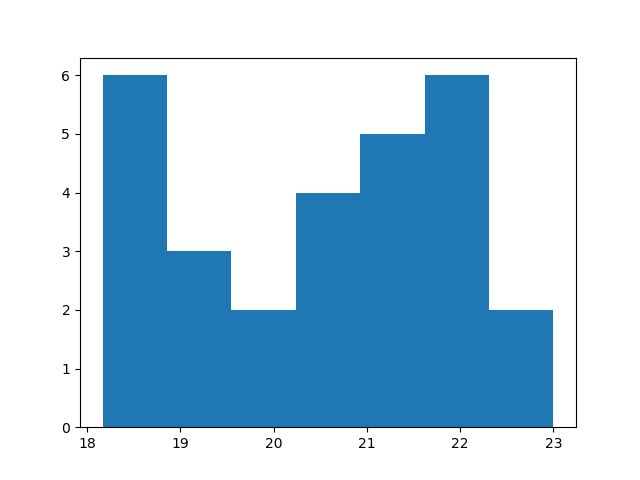

22.999517707161697


In [14]:
plt.figure()
plt.hist(t_rise_50[normal_lowz],bins=7)
print(np.max(t_rise_50[normal_lowz]))

In [15]:
print('The following are summary statistics for rise time:')
print('mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(t_rise_50[normal_lowz]), np.median(t_rise_50[normal_lowz]),
                                                                   np.average(t_rise_50[normal_lowz], 
                                                                              weights=w_i[normal_lowz])))
print('std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(t_rise_50[normal_lowz], ddof=1), 
                                                       1.4826*np.median(np.abs(t_rise_50[normal_lowz] - np.median(t_rise_50[normal_lowz]))),
                                                       1/np.sum(w_i[normal_lowz])*np.sqrt(np.sum((w_i[normal_lowz]*sigma_i[normal_lowz])**2))))

print('  If you restrict to only "good" SNe however:')
print('    mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(t_rise_50[normal_good_lowz]), np.median(t_rise_50[normal_good_lowz]),
                                                                   np.average(t_rise_50[normal_good_lowz], 
                                                                              weights=w_i[normal_good_lowz])))
print('    std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(t_rise_50[normal_good_lowz], ddof=1), 
                                                                   1.4826*np.median(np.abs(t_rise_50[normal_good_lowz] - np.median(t_rise_50[normal_good_lowz]))), 
                                                                   1/np.sum(w_i[normal_good_lowz])*np.sqrt(np.sum((w_i[normal_good_lowz]*sigma_i[normal_good_lowz])**2))))

print('\tFurther restrict to host-z SNe however:')
print('\t  mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(t_rise_50[normal_good_host_lowz]), np.median(t_rise_50[normal_good_host_lowz]),
                                                                   np.average(t_rise_50[normal_good_host_lowz], 
                                                                              weights=w_i[normal_good_host_lowz])))
print('\t  std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(t_rise_50[normal_good_host_lowz], ddof=1), 
                                                                   1.4826*np.median(np.abs(t_rise_50[normal_good_host_lowz] - np.median(t_rise_50[normal_good_host_lowz]))), 
                                                                   1/np.sum(w_i[normal_good_host_lowz])*np.sqrt(np.sum((w_i[normal_good_host_lowz]*sigma_i[normal_good_host_lowz])**2))))

The following are summary statistics for rise time:
mean, median, weighted mean: 20.51776, 20.50461, 21.16798
std, sMAD, sigma w_mean: 1.45710, 2.07489, 0.02098
  If you restrict to only "good" SNe however:
    mean, median, weighted mean: 20.58930, 20.52734, 21.16890
    std, sMAD, sigma w_mean: 1.43387, 2.02832, 0.02099
	Further restrict to host-z SNe however:
	  mean, median, weighted mean: 20.50924, 20.50461, 21.16477
	  std, sMAD, sigma w_mean: 1.47281, 2.09513, 0.02118


### Repeat analysis for the mixed sample of SNe

In [16]:
dic_df = pd.read_csv('dic_results.csv')

In [17]:
no_t2 = np.where(((dic_df.dic_evidence == 'decisive') | (dic_df.dic_evidence == 'very strong')) &  
                 (res.final_selection == 1))[0]
print(len(no_t2))

13


In [18]:
t_rise_16[no_t2] = res.t_rise_16.values.copy()[no_t2]
t_rise_50[no_t2] = res.t_rise_50.values.copy()[no_t2]
t_rise_84[no_t2] = res.t_rise_84.values.copy()[no_t2]

sigma_i = (t_rise_84-t_rise_16)/2
w_i = (sigma_i)**(-2)

In [19]:
print('The following are summary statistics for rise time:')
print('mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(t_rise_50[normal_lowz]), np.median(t_rise_50[normal_lowz]),
                                                                   np.average(t_rise_50[normal_lowz], 
                                                                              weights=w_i[normal_lowz])))
print('std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(t_rise_50[normal_lowz], ddof=1), 
                                                       1.4826*np.median(np.abs(t_rise_50[normal_lowz] - np.median(t_rise_50[normal_lowz]))),
                                                       1/np.sum(w_i[normal_lowz])*np.sqrt(np.sum((w_i[normal_lowz]*sigma_i[normal_lowz])**2))))

print('  If you restrict to only "good" SNe however:')
print('    mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(t_rise_50[normal_good_lowz]), np.median(t_rise_50[normal_good_lowz]),
                                                                   np.average(t_rise_50[normal_good_lowz], 
                                                                              weights=w_i[normal_good_lowz])))
print('    std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(t_rise_50[normal_good_lowz], ddof=1), 
                                                                   1.4826*np.median(np.abs(t_rise_50[normal_good_lowz] - np.median(t_rise_50[normal_good_lowz]))), 
                                                                   1/np.sum(w_i[normal_good_lowz])*np.sqrt(np.sum((w_i[normal_good_lowz]*sigma_i[normal_good_lowz])**2))))

print('\tFurther restrict to host-z SNe however:')
print('\t  mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(t_rise_50[normal_good_host_lowz]), np.median(t_rise_50[normal_good_host_lowz]),
                                                                   np.average(t_rise_50[normal_good_host_lowz], 
                                                                              weights=w_i[normal_good_host_lowz])))
print('\t  std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(t_rise_50[normal_good_host_lowz], ddof=1), 
                                                                   1.4826*np.median(np.abs(t_rise_50[normal_good_host_lowz] - np.median(t_rise_50[normal_good_host_lowz]))), 
                                                                   1/np.sum(w_i[normal_good_host_lowz])*np.sqrt(np.sum((w_i[normal_good_host_lowz]*sigma_i[normal_good_host_lowz])**2))))

The following are summary statistics for rise time:
mean, median, weighted mean: 19.75843, 19.58847, 19.45520
std, sMAD, sigma w_mean: 1.37175, 1.35126, 0.03351
  If you restrict to only "good" SNe however:
    mean, median, weighted mean: 19.80185, 19.66088, 19.45599
    std, sMAD, sigma w_mean: 1.37814, 1.30155, 0.03352
	Further restrict to host-z SNe however:
	  mean, median, weighted mean: 19.62335, 19.51187, 19.36108
	  std, sMAD, sigma w_mean: 1.32400, 1.32875, 0.03434


### Repeat analysis for just alpha != 2 (DIC selected subsection)

In [22]:
normal_lowz = np.intersect1d(normal_lowz, no_t2)
normal_good_lowz = np.intersect1d(normal_good_lowz, no_t2)
normal_good_host_lowz = np.intersect1d(normal_good_host_lowz, no_t2)

In [23]:
print('The following are summary statistics for rise time:')
print('mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(t_rise_50[normal_lowz]), np.median(t_rise_50[normal_lowz]),
                                                                   np.average(t_rise_50[normal_lowz], 
                                                                              weights=w_i[normal_lowz])))
print('std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(t_rise_50[normal_lowz], ddof=1), 
                                                       1.4826*np.median(np.abs(t_rise_50[normal_lowz] - np.median(t_rise_50[normal_lowz]))),
                                                       1/np.sum(w_i[normal_lowz])*np.sqrt(np.sum((w_i[normal_lowz]*sigma_i[normal_lowz])**2))))

print('  If you restrict to only "good" SNe however:')
print('    mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(t_rise_50[normal_good_lowz]), np.median(t_rise_50[normal_good_lowz]),
                                                                   np.average(t_rise_50[normal_good_lowz], 
                                                                              weights=w_i[normal_good_lowz])))
print('    std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(t_rise_50[normal_good_lowz], ddof=1), 
                                                                   1.4826*np.median(np.abs(t_rise_50[normal_good_lowz] - np.median(t_rise_50[normal_good_lowz]))), 
                                                                   1/np.sum(w_i[normal_good_lowz])*np.sqrt(np.sum((w_i[normal_good_lowz]*sigma_i[normal_good_lowz])**2))))

print('\tFurther restrict to host-z SNe however:')
print('\t  mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(t_rise_50[normal_good_host_lowz]), np.median(t_rise_50[normal_good_host_lowz]),
                                                                   np.average(t_rise_50[normal_good_host_lowz], 
                                                                              weights=w_i[normal_good_host_lowz])))
print('\t  std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(t_rise_50[normal_good_host_lowz], ddof=1), 
                                                                   1.4826*np.median(np.abs(t_rise_50[normal_good_host_lowz] - np.median(t_rise_50[normal_good_host_lowz]))), 
                                                                   1/np.sum(w_i[normal_good_host_lowz])*np.sqrt(np.sum((w_i[normal_good_host_lowz]*sigma_i[normal_good_host_lowz])**2))))

The following are summary statistics for rise time:
mean, median, weighted mean: 19.09761, 19.21959, 18.83624
std, sMAD, sigma w_mean: 1.32714, 0.76041, 0.03148
  If you restrict to only "good" SNe however:
    mean, median, weighted mean: 19.09761, 19.21959, 18.83624
    std, sMAD, sigma w_mean: 1.32714, 0.76041, 0.03148
	Further restrict to host-z SNe however:
	  mean, median, weighted mean: 19.09761, 19.21959, 18.83624
	  std, sMAD, sigma w_mean: 1.32714, 0.76041, 0.03148


In [24]:
sigma_i = (flat_alpha_g_84-flat_alpha_g_16)/2
w_i = (sigma_i)**(-2)

print('The following are summary statistics for alpha_g:')
print('mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(flat_alpha_g_50[normal_lowz]), np.median(flat_alpha_g_50[normal_lowz]),
                                                                   np.average(flat_alpha_g_50[normal_lowz], 
                                                                              weights=w_i[normal_lowz])))
print('std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(flat_alpha_g_50[normal_lowz], ddof=1), 
                                                       1.4826*np.median(np.abs(flat_alpha_g_50[normal_lowz] - np.median(flat_alpha_g_50[normal_lowz]))),
                                                       1/np.sum(w_i[normal_lowz])*np.sqrt(np.sum((w_i[normal_lowz]*sigma_i[normal_lowz])**2))))

print('  If you restrict to only "good" SNe however:')
print('    mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(flat_alpha_g_50[normal_good_lowz]), np.median(flat_alpha_g_50[normal_good_lowz]),
                                                                   np.average(flat_alpha_g_50[normal_good_lowz], 
                                                                              weights=w_i[normal_good_lowz])))
print('    std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(flat_alpha_g_50[normal_good_lowz], ddof=1), 
                                                                   1.4826*np.median(np.abs(flat_alpha_g_50[normal_good_lowz] - np.median(flat_alpha_g_50[normal_good_lowz]))), 
                                                                   1/np.sum(w_i[normal_good_lowz])*np.sqrt(np.sum((w_i[normal_good_lowz]*sigma_i[normal_good_lowz])**2))))

print('\tFurther restrict to host-z SNe however:')
print('\t  mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(flat_alpha_g_50[normal_good_host_lowz]), np.median(flat_alpha_g_50[normal_good_host_lowz]),
                                                                   np.average(flat_alpha_g_50[normal_good_host_lowz], 
                                                                              weights=w_i[normal_good_host_lowz])))
print('\t  std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(flat_alpha_g_50[normal_good_host_lowz], ddof=1), 
                                                                   1.4826*np.median(np.abs(flat_alpha_g_50[normal_good_host_lowz] - np.median(flat_alpha_g_50[normal_good_host_lowz]))), 
                                                                   1/np.sum(w_i[normal_good_host_lowz])*np.sqrt(np.sum((w_i[normal_good_host_lowz]*sigma_i[normal_good_host_lowz])**2))))

The following are summary statistics for alpha_g:
mean, median, weighted mean: 2.54483, 2.50204, 2.14300
std, sMAD, sigma w_mean: 0.55384, 0.36168, 0.03123
  If you restrict to only "good" SNe however:
    mean, median, weighted mean: 2.54483, 2.50204, 2.14300
    std, sMAD, sigma w_mean: 0.55384, 0.36168, 0.03123
	Further restrict to host-z SNe however:
	  mean, median, weighted mean: 2.54483, 2.50204, 2.14300
	  std, sMAD, sigma w_mean: 0.55384, 0.36168, 0.03123


In [25]:
sigma_i = (flat_alpha_r_84-flat_alpha_r_16)/2
w_i = (sigma_i)**(-2)

print('The following are summary statistics for alpha_g:')
print('mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(flat_alpha_r_50[normal_lowz]), np.median(flat_alpha_r_50[normal_lowz]),
                                                                   np.average(flat_alpha_r_50[normal_lowz], 
                                                                              weights=w_i[normal_lowz])))
print('std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(flat_alpha_r_50[normal_lowz], ddof=1), 
                                                       1.4826*np.median(np.abs(flat_alpha_r_50[normal_lowz] - np.median(flat_alpha_r_50[normal_lowz]))),
                                                       1/np.sum(w_i[normal_lowz])*np.sqrt(np.sum((w_i[normal_lowz]*sigma_i[normal_lowz])**2))))

print('  If you restrict to only "good" SNe however:')
print('    mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(flat_alpha_r_50[normal_good_lowz]), np.median(flat_alpha_r_50[normal_good_lowz]),
                                                                   np.average(flat_alpha_r_50[normal_good_lowz], 
                                                                              weights=w_i[normal_good_lowz])))
print('    std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(flat_alpha_r_50[normal_good_lowz], ddof=1), 
                                                                   1.4826*np.median(np.abs(flat_alpha_r_50[normal_good_lowz] - np.median(flat_alpha_r_50[normal_good_lowz]))), 
                                                                   1/np.sum(w_i[normal_good_lowz])*np.sqrt(np.sum((w_i[normal_good_lowz]*sigma_i[normal_good_lowz])**2))))

print('\tFurther restrict to host-z SNe however:')
print('\t  mean, median, weighted mean: {:.5f}, {:.5f}, {:.5f}'.format(np.mean(flat_alpha_r_50[normal_good_host_lowz]), np.median(flat_alpha_r_50[normal_good_host_lowz]),
                                                                   np.average(flat_alpha_r_50[normal_good_host_lowz], 
                                                                              weights=w_i[normal_good_host_lowz])))
print('\t  std, sMAD, sigma w_mean: {:.5f}, {:.5f}, {:.5f}'.format(np.std(flat_alpha_r_50[normal_good_host_lowz], ddof=1), 
                                                                   1.4826*np.median(np.abs(flat_alpha_r_50[normal_good_host_lowz] - np.median(flat_alpha_r_50[normal_good_host_lowz]))), 
                                                                   1/np.sum(w_i[normal_good_host_lowz])*np.sqrt(np.sum((w_i[normal_good_host_lowz]*sigma_i[normal_good_host_lowz])**2))))

The following are summary statistics for alpha_g:
mean, median, weighted mean: 2.34931, 2.42209, 2.01934
std, sMAD, sigma w_mean: 0.52445, 0.26803, 0.03148
  If you restrict to only "good" SNe however:
    mean, median, weighted mean: 2.34931, 2.42209, 2.01934
    std, sMAD, sigma w_mean: 0.52445, 0.26803, 0.03148
	Further restrict to host-z SNe however:
	  mean, median, weighted mean: 2.34931, 2.42209, 2.01934
	  std, sMAD, sigma w_mean: 0.52445, 0.26803, 0.03148
